# I Solving the Sum of Two Digits Programming Challenge

## C++

In [31]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting APlusB.cpp


In [32]:
!g++ APlusB.cpp -o APlusB
!./APlusB

2
3
5

### Test input output files

In [33]:
%%writefile input1.txt
4 8

Overwriting input1.txt


In [34]:
%%writefile output1.txt
12

Overwriting output1.txt


In [35]:
%%writefile input2.txt
-5 9

Overwriting input2.txt


In [36]:
%%writefile output2.txt
4

Overwriting output2.txt


In [37]:
!./APlusB < input1.txt

12

In [38]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [39]:
!grep -xvFf output1.txt output1.txt 

In [40]:
!grep -xvFf output1.txt output2.txt 

4


In [41]:
!grep -xvFf output2.txt output1.txt 

12


In [42]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [43]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [44]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Overwriting sum.py


In [45]:
!python sum.py

2 1
3


In [46]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [47]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [48]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product.cpp


In [49]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

2
4
3
12


### Test 1: Small numbers

In [50]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [51]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [52]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [53]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [54]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product_long.cpp


In [55]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [56]:
%%writefile StressTest1.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;
using std::cout;

vector <int> a;

int MaxPairwiseProduct_Test(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            max_product = std::max(max_product,
                numbers[i] * numbers[j]);
        }
    }

    return max_product;
}

long long MaxPairwiseProduct_FastTest(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
			       aux_product =  (long long) numbers[i] * numbers[j];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {

    for (int j=0; j<20; j++) {
        int n = 2 + (rand() % (20 - 2 + 1));
        cout << n << "\n";
        vector <int> numbers;

        for (int i=0; i<n; i++) {
            numbers.push_back(1 + (rand() % (200000 - 1 + 1)));
        }

        for (int i=0; i<n; i++) {
            cout << numbers[i] << " ";
        cout << "\n";
        int maxTestRes = MaxPairwiseProduct_Test(numbers);
        long long maxFastTestRes = MaxPairwiseProduct_FastTest(numbers);

        if (maxTestRes != maxFastTestRes) {
            cout << "OK'nt: " << maxTestRes << " " << maxFastTestRes << "\n";
        } else {
            cout << "OK\n";
        }
    }
}

Overwriting StressTest1.cpp


### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [57]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200 <<"\n";  // n 
 for (int i=1; i < 200; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Overwriting Test2Write.cpp


In [58]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [59]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39402

real	0m0.004s
user	0m0.002s
sys	0m0.001s


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [60]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Overwriting test_init_vectors.cpp


In [61]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [62]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [63]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Overwriting max_pairwise_product_long_execints.cpp


In [64]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
198
100
67
50
40
34
29
25
23
20
19
2
2
2
2
2
2
2
1
0
0
82289


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [65]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [66]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [67]:
%%writefile max_pairwise_product_ef.cpp
#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

long long MaxPairwiseProductFast(const vector<int> &numbers) {
    int n = numbers.size();

    int maxInx1 = 0;
    for (int i = 0; i < n; ++i)
        if ((maxInx1 == 0) || (numbers[i] > numbers[maxInx1]))
            maxInx1 = i;

    int maxInx2 = 0;
    for (int j = 0; j < n; ++j)
        if ((j != maxInx1) && ((maxInx2 == 0) || (numbers[j] > numbers[maxInx2])))
            maxInx2 = j;

    return ((long long) (numbers[maxInx1])) * numbers[maxInx2];
}

int main() {
    
    int n;
    cin >> n;
    vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        cin >> numbers[i];
    }

    long long result = MaxPairwiseProductFast(numbers);
    cout << result << "\n";

    return 0;
    
}

Overwriting max_pairwise_product_ef.cpp


Test with inputs 1 and 2



In [68]:
!g++ max_pairwise_product_ef.cpp -o max_pairwise_product_ef
!time ./max_pairwise_product_ef < input1.txt
!time ./max_pairwise_product_ef < input2.txt

90

real	0m0.003s
user	0m0.000s
sys	0m0.003s
40000000000

real	0m0.007s
user	0m0.002s
sys	0m0.002s


Test and time it with input 3

In [69]:
!g++ max_pairwise_product_ef.cpp -o max_pairwise_product_ef
!time ./max_pairwise_product_ef < input3.txt

39402

real	0m0.004s
user	0m0.003s
sys	0m0.001s


20 stress tests

In [70]:
%%writefile StressTest2.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;
using std::cout;

vector <int> a;

long long MaxPairwiseProductFast(const vector<int> &numbers) {                                            
    int n = numbers.size();                                                                               

    int maxInx1 = 0;                                                                                  
    for (int i = 0; i < n; ++i)                                                                           
        if ((maxInx1 == 0) || (numbers[i] > numbers[maxInx1]))                                     
            maxInx1 = i;                                                                               

    int maxInx2 = 0;                                                                                 
    for (int j = 0; j < n; ++j)                                                                          
        if ((j != maxInx1) && ((maxInx2 == 0) || (numbers[j] > numbers[maxInx2])))             
            maxInx2 = j;                                                                              

    return ((long long) (numbers[maxInx1])) * numbers[maxInx2];                                     
}

long long MaxPairwiseProduct2(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {

    for (int j=0; j<20; j++) {

        int n = 2 + (rand() % (20 - 2 + 1));
        cout << n << "\n";
        vector <int> a;

        for (int i=0; i<n; i++) {
            a.push_back(1 + (rand() % (200000 - 1 + 1)));
        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";

        long long res1 = MaxPairwiseProduct2(a);
        long long res2 = MaxPairwiseProductFast(a);

        if (res1 != res2) {
            cout << "Incorrect: " << res1 << " " << res2 << "\n";
        }
        else {
            cout << "Correct\n";
        }
    }
}

Overwriting StressTest2.cpp


In [71]:
!g++ StressTest2.cpp -o StressTest2
!./StressTest2

4
130887 92778 36916 147794 
Incorrect: 19344313278 13712031732
10
85387 160493 116650 41422 2363 90028 168691 120060 97764 113927 
Correct
9
183427 89173 55737 5212 195369 102568 156430 65783 21531 
Incorrect: 35835949563 30561572670
8
65124 174068 103136 113930 179803 34023 123059 133070 
Correct
7
161394 18457 175012 78043 176230 177374 84422 
Correct
3
13785 98538 175199 
Correct
11
198316 64371 166414 3527 176092 68981 159957 41874 6863 199171 106997 
Incorrect: 39498796036 35072419732
18
102306 20926 77085 136328 60337 126506 150847 21730 61314 125858 16125 153896 19583 100546 98815 33368 115435 190365 
Correct
2
113751 171088 
Correct
15
117277 147179 95789 193585 105404 102652 192755 12400 199933 95061 149677 193369 147740 10013 36227 
Correct
7
148095 97540 140796 80571 51435 160379 97468 
Incorrect: 23751328005 22580721684
15
110098 12903 173318 170493 126653 60757 197302 160281 124287 9442 153866 29690 28445 146620 158441 
Correct
13
158032 108118 138098 105772 34482 90676 1

Count executed instructions in code and verify with inputs 1,2 and 3


In [72]:
%%writefile max_pairwise_product_ef_execints.cpp
#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

long long execints =0LL;

long long MaxPairwiseProductFast(const vector<int> &numbers) {
    
    long long m = 0LL;
    
    int n = numbers.size();
    execints++;

    int max_index1 = -1;
    execints++;

    execints++;
    for (int i = 0; i < n; ++i) {
        execints += 2;

        execints++;
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1])) {

            m++;

            max_index1 = i;
            execints++;
        }
    }

    cout << m << "\n";

    m = 0LL;

    int max_index2 = -1;
    execints++;

    execints++;
    for (int j = 0; j < n; ++j) {
        execints += 2;

        execints++;
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2]))) {

            m++;

            max_index2 = j;
            execints++;
        }
    }

    cout << m << "\n";

    execints++;
    return ((long long) (numbers[max_index1])) * numbers[max_index2];

}

int main() {

    int n;
    execints++;

    cin >> n;
    execints++;

    vector<int> numbers(n);
    execints += n;

    execints++;
    for (int i = 0; i < n; ++i) {                  
        execints += 2;
        cin >> numbers[i];
        execints++;
    }
    long long result = MaxPairwiseProductFast(numbers);
    cout << result << "\n";
    execints++;
    cout << execints << "\n";
    return 0;
}

Overwriting max_pairwise_product_ef_execints.cpp


In [73]:
!g++ max_pairwise_product_ef_execints.cpp -o max_pairwise_product_ef_execints
!time ./max_pairwise_product_ef_execints < input1.txt
!time ./max_pairwise_product_ef_execints < input2.txt
!time ./max_pairwise_product_ef_execints < input3.txt

10
9
90
129

real	0m0.003s
user	0m0.001s
sys	0m0.002s
3
4
40000000000
77

real	0m0.003s
user	0m0.002s
sys	0m0.001s
199
198
39402
2407

real	0m0.003s
user	0m0.001s
sys	0m0.003s


Calculate estimated time by instruction and number of instructions by second

In [74]:
print("Operaciones por segundo:",1/(0.067/2400009))
print("Tiempo por operación:", 0.067/2400009)

Operaciones por segundo: 35821029.85074627
Tiempo por operación: 2.7916561979559246e-08


### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [75]:
%%writefile max_pairwise_product_superef.cpp

#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

int main() {
    
    int n;
    int actualNum;
    int aux;
    int max1 = 0;
    int max2 = 0;
    cin >> n;

    for (int i = 0; i < n; ++i) {
        cin >> actualNum;
        if (max1 == 0) {
            max1 = actualNum;
        } else if (actualNum > max1) {
            aux = max1;
            max1 = actualNum;
            max2 = aux;
        } else if ((max2 == 0) || (actualNum > max2)) {
            max2 = actualNum;
        }
    }
    cout << (long long) max1*max2 << "\n";
    return 0;
}

Overwriting max_pairwise_product_superef.cpp


Test with inputs 1 and 2


 

In [76]:
!g++ max_pairwise_product_superef.cpp -o max_pairwise_product_superef
!time ./max_pairwise_product_superef < input1.txt

90

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [77]:
!g++ max_pairwise_product_superef.cpp -o max_pairwise_product_superef
!time ./max_pairwise_product_superef < input2.txt

40000000000

real	0m0.003s
user	0m0.001s
sys	0m0.002s


Test and time it with input 3

In [78]:
!g++ max_pairwise_product_superef.cpp -o max_pairwise_product_superef
!time ./max_pairwise_product_superef < input3.txt

39601

real	0m0.003s
user	0m0.001s
sys	0m0.002s


20 stress tests 

In [79]:
%%writefile StressTest3.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;
using std::cout;

vector <int> a;

long long MaxPairwiseProductFast(const vector<int> &numbers) {                                            
    int n = numbers.size();                                                                               

    int maxInx1 = 0;                                                                                  
    for (int i = 0; i < n; ++i)                                                                           
        if ((maxInx1 == 0) || (numbers[i] > numbers[maxInx1]))                                     
            maxInx1 = i;                                                                               

    int maxInx2 = 0;                                                                                 
    for (int j = 0; j < n; ++j)                                                                          
        if ((j != maxInx1) && ((maxInx2 == 0) || (numbers[j] > numbers[maxInx2])))             
            maxInx2 = j;                                                                              

    return ((long long) (numbers[maxInx1])) * numbers[maxInx2];                                     
}

int main() {

    for (int j=0; j<20; j++) {
        
        long long actual_num;
        long long aux;
        long long max1 = -1;
        long long max2 = -1;

        int n = 2 + (rand() % (20 - 2 + 1));
        cout << n << "\n";
        vector <int> a;

        for (int i=0; i<n; i++) {
            
            actual_num = 1 + (rand() % (200000 - 1 + 1));

            a.push_back(actual_num);

            if (max1 == -1) {
                max1 = actual_num;
            }
            
            else if (actual_num > max1) {
                aux = max1;
                max1 = actual_num;
                max2 = aux;
            }
            
            else if ((max2 == -1) || (actual_num > max2)) {
                max2 = actual_num;
            }

        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";

        long long resPairwise = MaxPairwiseProductFast(a);
        long long resMult = max1*max2;

        if (resPairwise != res2) {
            cout << "Wrong answer: " << resPairwise << " " << resMult << "\n";
        } else {
            cout << "OK\n";
        }
    }
}

Overwriting StressTest3.cpp


Count executed instructions in code and verify with inputs 1,2 and 3

In [80]:
!g++ max_pairwise_product_superef.cpp -o max_pairwise_product_superef
!time ./max_pairwise_product_superef < input1.txt
!time ./max_pairwise_product_superef < input2.txt
!time ./max_pairwise_product_superef < input3.txt

90

real	0m0.004s
user	0m0.002s
sys	0m0.001s
40000000000

real	0m0.003s
user	0m0.001s
sys	0m0.002s
39601

real	0m0.003s
user	0m0.002s
sys	0m0.001s


Calculate estimated time by instruction and number of instructions by second

In [81]:
%%writefile StressTest3.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;
using std::cout;

vector <int> a;

long long MaxPairwiseProductFast(const vector<int> &numbers) {                                            
    int n = numbers.size();                                                                               

    int maxInx1 = 0;                                                                                  
    for (int i = 0; i < n; ++i)                                                                           
        if ((maxInx1 == 0) || (numbers[i] > numbers[maxInx1]))                                     
            maxInx1 = i;                                                                               

    int maxInx2 = 0;                                                                                 
    for (int j = 0; j < n; ++j)                                                                          
        if ((j != maxInx1) && ((maxInx2 == 0) || (numbers[j] > numbers[maxInx2])))             
            maxInx2 = j;                                                                              

    return ((long long) (numbers[maxInx1])) * numbers[maxInx2];                                     
}

int main() {

    for (int j=0; j<20; j++) {
        
        long long actual_num;
        long long aux;
        long long max1 = -1;
        long long max2 = -1;

        int n = 2 + (rand() % (20 - 2 + 1));
        cout << n << "\n";
        vector <int> a;

        for (int i=0; i<n; i++) {
            actual_num = 1 + (rand() % (200000 - 1 + 1));
            a.push_back(actual_num);

            if (max1 == -1) {
                max1 = actual_num;
            } else if (actual_num > max1) {
                aux = max1;
                max1 = actual_num;
                max2 = aux;
            } else if ((max2 == -1) || (actual_num > max2)) {
                max2 = actual_num;
            }

        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";

        long long res1 = MaxPairwiseProductFast(a);
        long long res2 = max1*max2;

        if (res1 != res2) {
            cout << "Incorrect: " << res1 << " " << res2 << "\n";
        } else {
            cout << "Correct\n";
        }
    }
}

Overwriting StressTest3.cpp


### Testing Test Stress 3

In [82]:
!g++ StressTest3.cpp -o StressTest3
!./StressTest3

4
130887 92778 36916 147794 
Incorrect: 13712031732 19344313278
10
85387 160493 116650 41422 2363 90028 168691 120060 97764 113927 
Correct
9
183427 89173 55737 5212 195369 102568 156430 65783 21531 
Incorrect: 30561572670 35835949563
8
65124 174068 103136 113930 179803 34023 123059 133070 
Correct
7
161394 18457 175012 78043 176230 177374 84422 
Correct
3
13785 98538 175199 
Correct
11
198316 64371 166414 3527 176092 68981 159957 41874 6863 199171 106997 
Incorrect: 35072419732 39498796036
18
102306 20926 77085 136328 60337 126506 150847 21730 61314 125858 16125 153896 19583 100546 98815 33368 115435 190365 
Correct
2
113751 171088 
Correct
15
117277 147179 95789 193585 105404 102652 192755 12400 199933 95061 149677 193369 147740 10013 36227 
Correct
7
148095 97540 140796 80571 51435 160379 97468 
Incorrect: 22580721684 23751328005
15
110098 12903 173318 170493 126653 60757 197302 160281 124287 9442 153866 29690 28445 146620 158441 
Correct
13
158032 108118 138098 105772 34482 90676 1

## Python

In [ ]:
%reload_ext Cython

In [ ]:
%%cython
# distutils: extra_compile_args = -fopenmp
# distutils: extra_link_args = -fopenmp
# cython: language_level=3
# cython: embedsignature=True
# cython: profile=True
# cython: boundscheck=False
# coding: utf8

from libc.stdlib cimport malloc, realloc, free
from libc.stdio cimport fopen, fclose, FILE, EOF, fseek, SEEK_END, SEEK_SET
from libc.stdio cimport ftell, fgetc, fgets, getc, gets, feof, fread, getline
from libc.string cimport strlen, memcpy, strcpy, strtok, strchr, strncpy
from cython.parallel import prange, parallel, threadid

# - C structure that is set to readonly
cdef readonly struct FileContents:
    char *contents
    
cdef class CyReadFile:
    """Read in the contents of a file."""
    cdef:
        FileContents *File
        FILE *fp
        char *filename
        char *delimiter
        long file_size
        bint is_open
        bint EO_STR
    
    def __init__(self, char *delimiter, char *filename):
        self.File = <FileContents*>malloc(sizeof(CyReadFile))
        self.delimiter = delimiter
        self.filename = filename
        self.File.contents = NULL
        self.is_open = 0
        self.EO_STR = 0
        self.file_size = 0
        self.fp = NULL
        
    def open_file(self):
        """Open the file for reading."""
        self.fp = fopen(self.filename, "r")
        if self.fp == NULL:
            raise FileNotFoundError(2, "No such file or directory: '%s'" % self.filename)
        else:
            # file is now open
            self.is_open = 1
    
    def read_in_file(self):
        """Read in the entire file."""
        if self.is_open == 1:
            # get the length of the file
            fseek(self.fp, 0, SEEK_END)
            self.file_size = ftell(self.fp)
            fseek(self.fp, 0, SEEK_SET)
            # allocate memory for reading in the file
            self.File.contents = <char*>malloc(self.file_size*sizeof(char))
            # read entire file into the struct
            fread(self.File.contents, 1, self.file_size, self.fp)
            # close the file once it's read into the char array
            fclose(self.fp)
            # set is_open to 0
            self.is_open = 0
              
    def read_file_in_parallel(self):
        """Bypass the gil and read in the file."""
        if self.is_open == 1:
            with nogil:
                # get the length of the file
                fseek(self.fp, 0, SEEK_END)
                self.file_size = ftell(self.fp)
                fseek(self.fp, 0, SEEK_SET)
                # allocate memory for reading in the file
                self.File.contents = <char*>malloc(self.file_size*sizeof(char))
                # read entire file into the struct
                fread(self.File.contents, 1, self.file_size, self.fp)
                # close the file once it's read into the char array
                fclose(self.fp)
                # set is_open to 0
                self.is_open = 0
    
    def __dealloc__(self):
        """Deallocate memory"""
        free(self.File.contents)
        free(self.File)
        free(self.fp)
        free(self.filename)
        free(self.delimiter)
        

class PyReadFile(CyReadFile):
    """A python wrapper around a cython class."""
    def __init__(self, emlFile):
        super().__init__(b',', emlFile)
    
        
def py_read_file(filename):
    with open(filename, "r") as f:
        return f.read()

### Slow solution

In [6]:
def max_pairwise_product(n, a):

    auxproduct = 0                                                         
    result = 0 
    
    for i in range(0, n):                                             
        for j in range(i + 1, n):                                            
            auxproduct = a[i] * a[j]                                     
            if auxproduct > result:                    
                result = auxproduct                                            
    return result                                                            
                                                                                


Tests with inputs 1 and 2

In [7]:
input1 = PyReadFile(b"input1.txt")                                              
scanner = py_read_file(b"input1.txt").split()                                  

n = int(scanner[0])                                                              
a = []                                                                        

for i in range(1, len(scanner)):                                                 
    a.append(int(scanner[i]))                                                     

print(max_pairwise_product(n, a))                                           

90


In [8]:
input2 = PyReadFile(b"input2.txt")
scan = py_read_file(b"input2.txt").split()

b = []
n = int(scan[0])

for i in range(1, len(scan)):
    b.append(int(scan[i]))

print(max_pairwise_product(n, b))

40000000000


Count executed intructions in code and verify with inputs 1, 2 and 3

In [9]:
def max_pairwise_product(n, a, execints):

    result = 0                                                                  #1
    m = 0
    execints+=1
    aux_product = 0                                                             #1
    execints+=1

    execints+=1
    for i in range(0, n):                                                       #1 + 2n
        execints += 2
        execints+=1
        for j in range(i + 1, n):                                               #n+ (n-1)n
            execints += 2
            aux_product = a[i] * a[j]                                           #(n-1)n/2
            execints+=1
            execints+=1
            if aux_product > result:                                            #(n-1)n/2
                result = aux_product                                            #[0, (n-1)n/2]
                execints+=1
                m+=1
    return result, execints, m                                                  #--------------
                                                                                #3 + 3n + [2(n-1)n, 2.5 (n-1)n]                                     

In [10]:
%%time

pyrf4 = PyReadFile(b"input1.txt")
scan = py_read_file(b"input1.txt").split()

execints = 2

n = int(scan[0])
execints+=1
a = []
execints+=1

execints+=1
for i in range(1, len(scan)):
    execints += 2
    a.append(int(scan[i]))
    execints+=1

res, execints, m = max_pairwise_product(n, a, execints)

print(res)
print(m)
print(execints)

90
30
278
CPU times: user 1.65 ms, sys: 104 µs, total: 1.76 ms
Wall time: 1.4 ms


In [11]:
%%time

pyrf5 = PyReadFile(b"input2.txt")
scan = py_read_file(b"input2.txt").split()

execints = 2

n = int(scan[0])
execints+=1
a = []
execints+=1

execints+=1
for i in range(1, len(scan)):
    execints += 2
    a.append(int(scan[i]))
    execints+=1

res, execints, m = max_pairwise_product(n, a, execints)

print(res)
print(m)
print(execints)

40000000000
5
109
CPU times: user 1.02 ms, sys: 1.01 ms, total: 2.03 ms
Wall time: 2.05 ms


Calculate estimated time by instruction and number of instructions by second

In [12]:
#Estimated time by instruction
2499/80003472076

3.12361443216621e-08

In [13]:
# Estimated number of instructions by second
1/(2499/80003472076)

32014194.508203283

## Efficient solution

In [14]:
# PYTHON
def maxPairwiseProduct(n, numbers):
    maxInx1 = 0
    for i in range(n):
        if (maxInx1 == 0 or numbers[i] > numbers[maxInx1]):
            maxInx1 = i

    maxInx2 = 0
    for i in range(n):
        if (i != maxInx1 and (maxInx2 == 0 or numbers[i] > numbers[maxInx2])):
            maxInx2 = i

    return numbers[maxInx1] * numbers[maxInx2]

Test with inputs 1 and 2



In [15]:
input1Test = PyReadFile(b"input1.txt")
input1Scan = py_read_file(b"input1.txt").split()

n = int(input1Scan[0])
numberData = []                                                                          

for i in range(1, len(input1Scan)):
    numberData.append(int(input1Scan[i]))

print(maxPairwiseProduct(n, numberData))

90


In [16]:
input2Test = PyReadFile(b"input2.txt")
input2Scan = py_read_file(b"input2.txt").split()

n = int(input2Scan[0])
numberData = []                                                                          

for i in range(1, len(input2Scan)):
    numberData.append(int(input2Scan[i]))

print(maxPairwiseProduct(n, numberData))


40000000000


20 Stress tests

In [17]:
from random import randint

def max_pairwise_product(n, a):

    result = 0

    for i in range(0, n):
        for j in range(i + 1, n):
            if a[i] * a[j] > result:
                result = a[i] * a[j]
    return result

def max_pairwise_product_fast(n, numbers):
    max_index1 = -1                                                             
    for i in range(n):                                                          
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:                
            max_index1 = i                                                      

    max_index2 = -1                                                                     
    for i in range(n):                                                                  
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):        
            max_index2 = i                                                                    

    return numbers[max_index1] * numbers[max_index2]      

if __name__ == '__main__':

    for i in range(20):
      
      n = randint(2, 10)

      print(n)

      a = []
      max1 = -1
      max2 = -1

      for j in range(n):

          actual_num = randint(1, 200000)
          print(actual_num, end=" ")

          a.append(actual_num)

          if max1 == -1:
              max1 = actual_num
          
          elif actual_num > max1:
              aux = max1
              max1 = actual_num
              max2 = aux
          
          elif (max2 == -1) or (actual_num > max2):
              max2 = actual_num

      res1 = max_pairwise_product(n, a)
      res2 = max_pairwise_product_fast(n, a)

      print()

      if res1 != res2:
          print("Wrong answer:", res1, res2, "\n")
          break

      else:
          print("OK \n")

7
169509 135786 199893 77261 166164 196008 67978 
OK 

5
5183 117530 159051 181702 92015 
OK 

3
723 37362 195922 
OK 

4
38188 44344 118200 158030 
OK 

9
164092 48728 112869 32434 10078 46756 7806 125884 75970 
OK 

9
26881 53021 86255 68072 59992 123853 173293 64347 25109 
OK 

7
79629 177707 134582 82121 174468 45221 58300 
OK 

2
172348 110157 
OK 

6
180739 199481 52644 97141 4540 161424 
OK 

2
15662 84364 
OK 

3
72853 79442 78676 
OK 

6
62336 130816 40500 133247 113367 103758 
OK 

8
133937 29124 182154 180821 72713 167289 59189 120485 
OK 

5
14234 54195 25205 48367 193505 
OK 

6
62414 132621 3441 179769 188036 4487 
OK 

6
138674 98337 285 129599 100674 73932 
OK 

7
83748 88641 144844 10513 178017 2285 3639 
OK 

6
73287 4572 6617 50620 155790 9916 
OK 

6
4933 108247 18411 98226 11682 132228 
OK 

9
113026 162359 18116 90126 55563 34883 109713 104171 59317 
OK 



Count executed intructions in code and verify with inputs 1, 2 

In [18]:
def max_pairwise_product_fast(n, numbers, execints):

    m = 0

    max_index1 = -1                                                            
    execints += 1

    execints += 1
    for i in range(n):                                                      
        execints += 2

        execints += 1
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:               
            max_index1 = i                                                    
            execints += 1
            m += 1

    max_index2 = -1                                                         
    execints += 1

    execints += 1
    for i in range(n):                                                          
        execints += 2

        execints += 1
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):            
            max_index2 = i                                                                         
            execints += 1
            m += 1

    return numbers[max_index1] * numbers[max_index2], execints, m                                              

In [19]:
%%time

pyrf10 = PyReadFile(b"input1.txt")
scan = py_read_file(b"input1.txt").split()

execints = 2

n = int(scan[0])
execints+=1
a = []
execints+=1

execints+=1
for i in range(1, len(scan)):
    execints += 2
    a.append(int(scan[i]))
    execints+=1

res, execints, m = max_pairwise_product_fast(n, a, execints)

print(res)
print(m)
print(execints)

90
19
118
CPU times: user 1.32 ms, sys: 0 ns, total: 1.32 ms
Wall time: 1.33 ms


In [20]:
inputB = PyReadFile(b"input2.txt")
scan = py_read_file(b"input2.txt").split()

execints = 2

n = int(scan[0])
execints+=1
a = []
execints+=1

execints+=1
for i in range(1, len(scan)):
    execints += 2
    a.append(int(scan[i]))
    execints+=1

res, execints, m = max_pairwise_product_fast(n, a, execints)

print(res)
print(m)
print(execints)

40000000000
7
70


Calculate estimated time by instruction and number of instructions by second

In [21]:
#Estimated time by instruction
0.148/2200008

6.727248264551765e-08

In [22]:
# Estimated number of instructions by second
1/(0.148/2200008)

14864918.918918919


### Super efficient solution


Test with inputs 1 and 2

In [23]:
if __name__ == '__main__':

    inputD = PyReadFile(b"input1.txt")                                        
    scan = py_read_file(b"input1.txt").split()                                

    n = scan[0]                                                                 
    a = map(int, scan[1:])                                                      

    max1 = -1                                                                
    max2 = -1                                                                

    for actual_num in a:                                                        
        if max1 == -1:                                                        
            max1 = actual_num                                                
        
        elif actual_num > max1:                                            
            aux = max1                                                        
            max1 = actual_num                                                
            max2 = aux                                                        
        
        elif (actual_num == -1) or (actual_num > max2):                         
            max2 = actual_num                                                  

    print(max1*max2)

90


In [24]:
if __name__ == '__main__':

    inputE = PyReadFile(b"input2.txt")                                         
    scan = py_read_file(b"input2.txt").split()                                 

    n = scan[0]                                                                
    a = map(int, scan[1:])                                                     

    max1 = -1                                                                  
    max2 = -1                                                                   

    for actual_num in a:                                                        
        if max1 == -1:                                                        
            max1 = actual_num                                                   
        
        elif actual_num > max1:                                              
            aux = max1                                                        
            max1 = actual_num                                                
            max2 = aux                                                        
        
        elif (actual_num == -1) or (actual_num > max2):                       
            max2 = actual_num                                                  

    print(max1*max2)

40000000000



20 stress tests

In [25]:
from random import randint

def max_pairwise_product_fast(n, numbers):
    max_index1 = -1                                                             
    for i in range(n):                                                          
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:                
            max_index1 = i                                                      

    max_index2 = -1                                                                     
    for i in range(n):                                                                  
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):        
            max_index2 = i                                                                    

    return numbers[max_index1] * numbers[max_index2]

if __name__ == '__main__':

    for i in range(20):
      
      n = randint(2, 10)

      print(n)

      a = []
      max1 = -1
      max2 = -1

      for j in range(n):

          actual_num = randint(1, 200000)
          print(actual_num, end=" ")

          a.append(actual_num)

          if max1 == -1:
              max1 = actual_num
          
          elif actual_num > max1:
              aux = max1
              max1 = actual_num
              max2 = aux
          
          elif (actual_num == -1) or (actual_num > max2):
              max2 = actual_num

      res1 = max_pairwise_product_fast(n, a)
      res2 = max1*max2

      print()

      if res1 != res2:
          print("Wrong answer:", res1, res2, "\n")
          break

      else:
          print("OK \n")

9
52000 15702 48058 57405 143877 69877 35662 145783 187284 
OK 

10
61843 70505 186770 148300 73483 140717 44957 191561 196419 69499 
OK 

10
9420 119289 13021 36257 3277 60149 184487 152583 38648 127703 
OK 

3
104227 48377 29661 
OK 

7
94101 101010 114700 171220 8189 23289 131336 
OK 

5
154479 109688 173267 155999 188514 
OK 

5
145940 2622 138545 111406 40786 
OK 

9
1480 65857 9566 162494 166339 26815 158682 155167 27146 
OK 

7
22582 116802 153682 164931 116785 79422 75251 
OK 

10
98014 47274 111920 42660 163027 30879 35726 73987 129481 162381 
OK 

6
42642 48623 96878 171432 48419 111226 
OK 

10
165870 73529 157019 32562 125888 43536 187353 4889 146034 150714 
OK 

9
194506 42659 3993 112091 15515 181357 190993 104524 159512 
OK 

4
144129 146236 22257 189273 
OK 

4
28699 115321 63553 179454 
OK 

10
192336 79246 115331 64152 96440 150934 131925 125402 182761 116601 
OK 

9
27280 76038 95015 73599 191681 175133 134221 132240 69015 
OK 

10
60638 151112 115396 56745 45970 163

Count executed intructions in code and verify with inputs 1, 2 and 3

In [26]:
if __name__ == '__main__':

    pyrf16 = PyReadFile(b"input1.txt")                                        
    scan = py_read_file(b"input1.txt").split()                                  

    execints = 2
    m = 0

    n = scan[0]                                                                
    execints+=1
    a = map(int, scan[1:])                                                     
    execints+=1

    max1 = -1                                                                  
    execints+=1
    max2 = -1                                                                  
    execints+=1


    execints+=1
    for actual_num in a:                                                       
        execints+=2

        execints+=1
        if max1 == -1:                                                         
            max1 = actual_num                                                  
            execints+=1
            m+=1
        
        elif actual_num > max1:                                                 
            aux = max1                                                       
            max1 = actual_num                                                  
            max2 = aux                                                          
            execints+=3
            m+=3
        
        elif (actual_num == -1) or (actual_num > max2):                       
            max2 = actual_num                                                   
            execints+=1
            m+=1

    print(max1*max2)                                                          
    print(m)                                                                  
    print(execints)

90
28
65


In [27]:
if __name__ == '__main__':

    inputG = PyReadFile(b"input2.txt")                                       
    scan = py_read_file(b"input2.txt").split()                                 

    execints = 2

    m = 0

    n = scan[0]                                                                
    execints+=1
    a = map(int, scan[1:])                                                     
    execints+=1

    max1 = -1                                                               
    execints=execints+1
    max2 = -1                                                                 
    execints=execints+1


    execints+=1
    for actual_num in a:                                                      
        execints+=2

        execints+=1
        if max1 == -1:                                                       
            max1 = actual_num                                                  
            execints+=1
            m+=1
        
        elif actual_num > max1:                                               
            aux = max1                                                          
            max1 = actual_num                                                   
            max2 = aux                                                          
            execints+=3
            m+=3
        
        elif (actual_num == -1) or (actual_num > max2):                         
            max2 = actual_num                                                  
            execints+=1
            m+=1

    print(max1*max2)                                                          
    print(m)                                                                  
    print(execints)

40000000000
9
34


In [28]:
if __name__ == '__main__':

    inputH = PyReadFile(b"input3.txt")                                        
    scan = py_read_file(b"input3.txt").split()                                 

    execints = 2

    m = 0

    n = scan[0]                                                                
    execints+=1
    a = map(int, scan[1:])                                                    
    execints+=1

    max1 = -1                                                               
    execints+=1
    max2 = -1                                                                  
    execints+=1


    execints+=1
    for actual_num in a:                                                        
        execints+=2

        execints+=1
        if max1 == -1:                                                          
            max1 = actual_num                                                  
            execints+=1
            m += 1
        
        elif actual_num > max1:                                                
            aux = max1                                                         
            max1 = actual_num                                                 
            max2 = aux                                                         
            execints+=3
            m += 3
        
        elif (actual_num == -1) or (actual_num > max2):                        
            max2 = actual_num                                                   
            execints+=1

            m += 1

    print(max1*max2)                                                           
    print(m)                                                                 
    print(execints)

39402
595
1199


Calculate estimated time by instruction and number of instructions by second

In [29]:
#Estimated time by instruction
0.0975/1200005

8.124966145974392e-08

In [30]:
# Estimated number of instructions by second
1/(0.0975/1200005)

12307743.58974359

Efficient cython file reading, string parsing, and array building

https://stackoverflow.com/questions/37219875/efficient-cython-file-reading-string-parsing-and-array-building



File PreProcessing With C and Cython

https://github.com/EveryTimeIWill18/Cython_Repo/blob/master/FastFileProcessingWithCython.ipynb



# Screenshots of the Coursera Submissions in C++ and Python

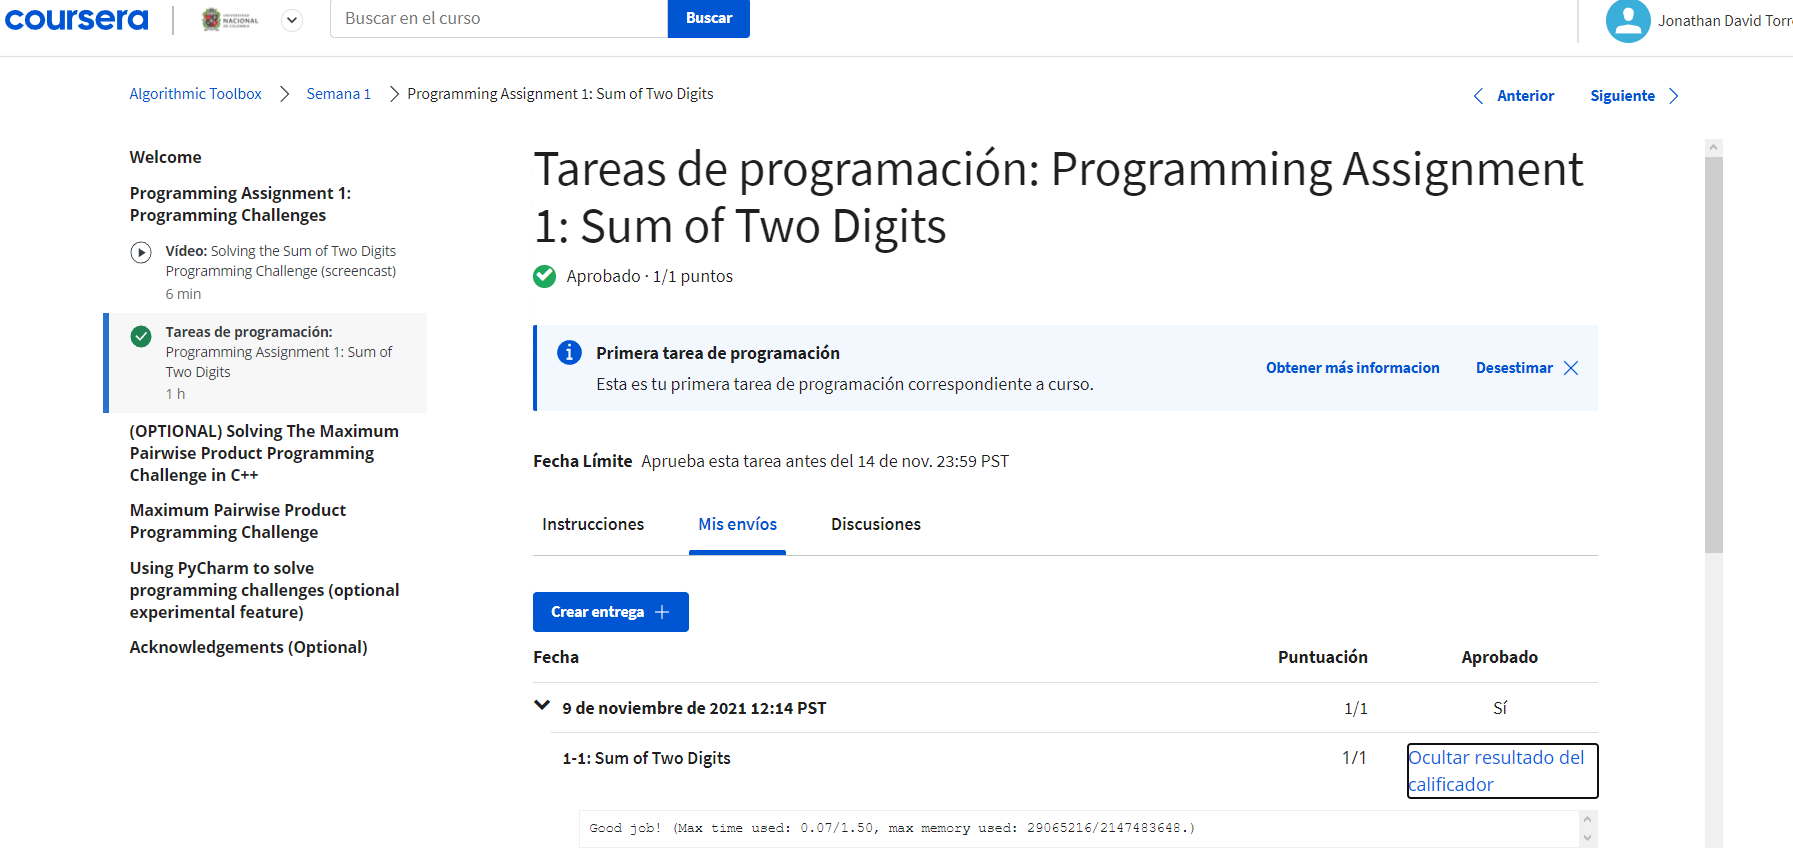

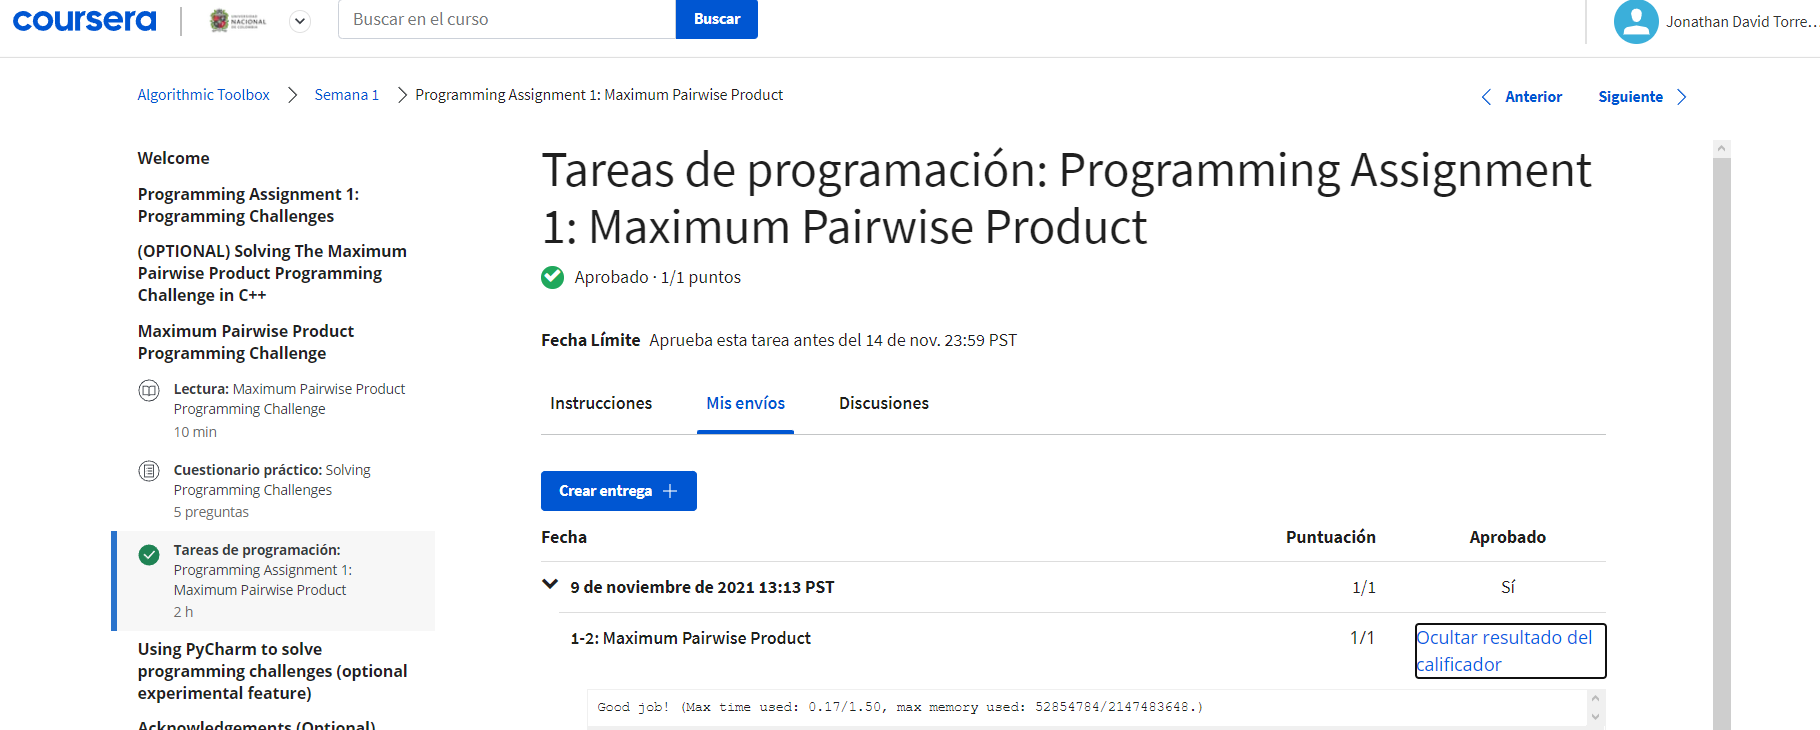

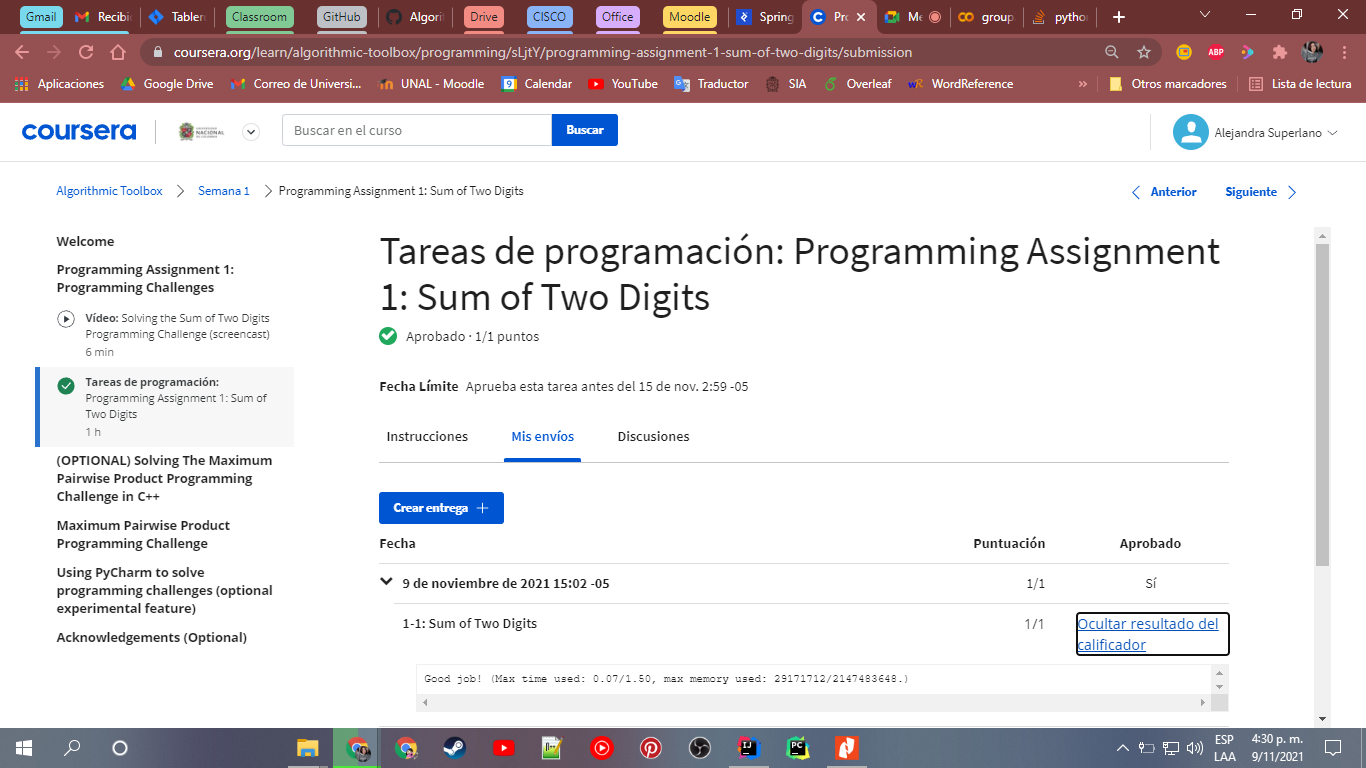

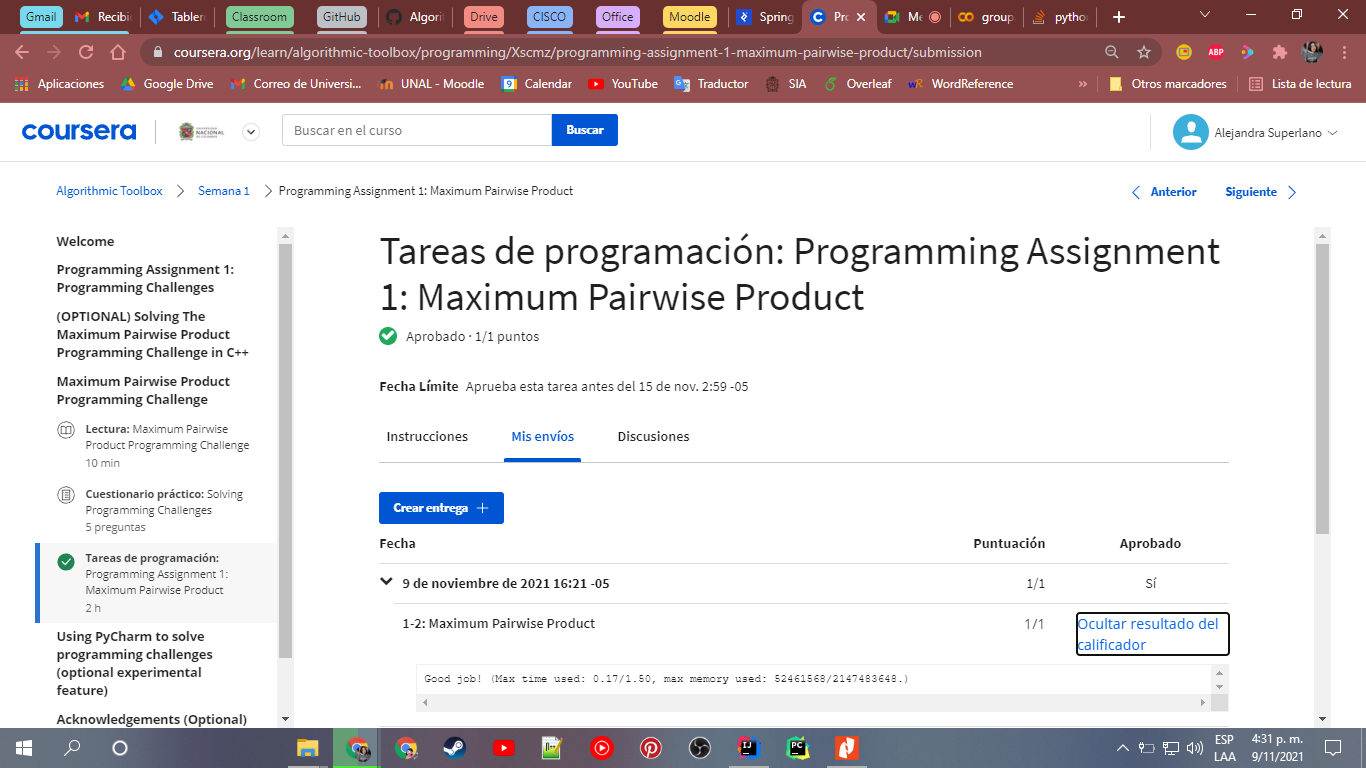